<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Financial Time Series

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')
mpl.rc('figure', dpi=1200)
import seaborn
seaborn.set_style("whitegrid")

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.853647,  1.306777, -1.553704,  0.020458],
       [ 0.034563,  0.026916,  0.719798, -1.545686],
       [ 0.139713, -1.00518 ,  0.94371 , -0.480034],
       [-0.106122, -1.696733, -0.237294, -0.567758],
       [-0.11    ,  0.909331,  0.142697, -1.097947],
       [ 0.143025, -0.299585, -0.230714, -0.901604],
       [-0.126327, -0.260494,  0.344124, -0.485011],
       [ 1.517069, -1.071105, -0.313902,  0.567675],
       [-0.676745,  1.042709, -0.581725, -0.90965 ]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.853647,1.306777,-1.553704,0.020458
1,0.034563,0.026916,0.719798,-1.545686
2,0.139713,-1.005180,0.943710,-0.480034
3,-0.106122,-1.696733,-0.237294,-0.567758
4,-0.110000,0.909331,0.142697,-1.097947
5,0.143025,-0.299585,-0.230714,-0.901604
6,-0.126327,-0.260494,0.344124,-0.485011
7,1.517069,-1.071105,-0.313902,0.567675
8,-0.676745,1.042709,-0.581725,-0.909650


In [23]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.853647,1.306777,-1.553704,0.020458
1,0.034563,0.026916,0.719798,-1.545686
2,0.139713,-1.005180,0.943710,-0.480034
3,-0.106122,-1.696733,-0.237294,-0.567758
4,-0.110000,0.909331,0.142697,-1.097947
5,0.143025,-0.299585,-0.230714,-0.901604
6,-0.126327,-0.260494,0.344124,-0.485011
7,1.517069,-1.071105,-0.313902,0.567675
8,-0.676745,1.042709,-0.581725,-0.909650


In [24]:
df['No2'][3]  # value in column No2 at index position 3

-1.6967329486754474

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.853647,1.306777,-1.553704,0.020458
2015-02-28,0.034563,0.026916,0.719798,-1.545686
2015-03-31,0.139713,-1.005180,0.943710,-0.480034
2015-04-30,-0.106122,-1.696733,-0.237294,-0.567758
2015-05-31,-0.110000,0.909331,0.142697,-1.097947
2015-06-30,0.143025,-0.299585,-0.230714,-0.901604
2015-07-31,-0.126327,-0.260494,0.344124,-0.485011
2015-08-31,1.517069,-1.071105,-0.313902,0.567675
2015-09-30,-0.676745,1.042709,-0.581725,-0.909650


In [27]:
np.array(df).round(6)

array([[ 0.853647,  1.306777, -1.553704,  0.020458],
       [ 0.034563,  0.026916,  0.719798, -1.545686],
       [ 0.139713, -1.00518 ,  0.94371 , -0.480034],
       [-0.106122, -1.696733, -0.237294, -0.567758],
       [-0.11    ,  0.909331,  0.142697, -1.097947],
       [ 0.143025, -0.299585, -0.230714, -0.901604],
       [-0.126327, -0.260494,  0.344124, -0.485011],
       [ 1.517069, -1.071105, -0.313902,  0.567675],
       [-0.676745,  1.042709, -0.581725, -0.90965 ]])

### Basic Analytics

In [28]:
df.sum()

No1    1.668822
No2   -1.047364
No3   -0.767010
No4   -5.399558
dtype: float64

In [29]:
df.mean()

No1    0.185425
No2   -0.116374
No3   -0.085223
No4   -0.599951
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.853647,1.306777,-1.553704,0.020458
2015-02-28,0.888209,1.333694,-0.833907,-1.525228
2015-03-31,1.027922,0.328513,0.109804,-2.005263
2015-04-30,0.921800,-1.368220,-0.127490,-2.573021
2015-05-31,0.811800,-0.458889,0.015207,-3.670968
2015-06-30,0.954826,-0.758474,-0.215506,-4.572572
2015-07-31,0.828499,-1.018968,0.128618,-5.057583
2015-08-31,2.345568,-2.090073,-0.185285,-4.489909
2015-09-30,1.668822,-1.047364,-0.767010,-5.399558


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.185425,-0.116374,-0.085223,-0.599951
std,0.638283,1.042521,0.745200,0.623118
min,-0.676745,-1.696733,-1.553704,-1.545686
25%,-0.110000,-1.005180,-0.313902,-0.909650
50%,0.034563,-0.260494,-0.230714,-0.567758
75%,0.143025,0.909331,0.344124,-0.480034
max,1.517069,1.306777,0.943710,0.567675


In [32]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,0.923930,1.143143,NaN,0.143030
2015-02-28,0.185910,0.164062,0.848409,NaN
2015-03-31,0.373782,NaN,0.971447,NaN
2015-04-30,NaN,NaN,NaN,NaN
2015-05-31,NaN,0.953588,0.377753,NaN
2015-06-30,0.378187,NaN,NaN,NaN
2015-07-31,NaN,NaN,0.586621,NaN
2015-08-31,1.231693,NaN,NaN,0.753442
2015-09-30,NaN,1.021131,NaN,NaN


In [33]:
np.sqrt(df).sum()

No1    3.093503
No2    3.281926
No3    2.784230
No4    0.896472
dtype: float64

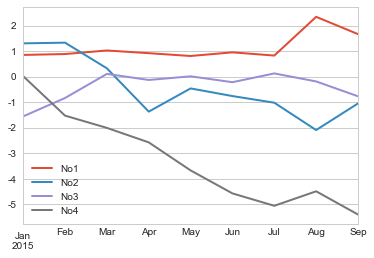

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    0.853647
2015-02-28    0.034563
2015-03-31    0.139713
2015-04-30   -0.106122
2015-05-31   -0.110000
2015-06-30    0.143025
2015-07-31   -0.126327
2015-08-31    1.517069
2015-09-30   -0.676745
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

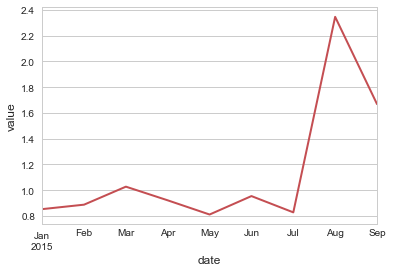

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.853647,1.306777,-1.553704,0.020458,Q1
2015-02-28,0.034563,0.026916,0.719798,-1.545686,Q1
2015-03-31,0.139713,-1.005180,0.943710,-0.480034,Q1
2015-04-30,-0.106122,-1.696733,-0.237294,-0.567758,Q2
2015-05-31,-0.110000,0.909331,0.142697,-1.097947,Q2
2015-06-30,0.143025,-0.299585,-0.230714,-0.901604,Q2
2015-07-31,-0.126327,-0.260494,0.344124,-0.485011,Q3
2015-08-31,1.517069,-1.071105,-0.313902,0.567675,Q3
2015-09-30,-0.676745,1.042709,-0.581725,-0.909650,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.342641,0.109504,0.036601,-0.668421
Q2,-0.024366,-0.362329,-0.108437,-0.855770
Q3,0.237999,-0.096297,-0.183835,-0.275662


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.853647,1.306777,0.943710,0.020458
Q2,0.143025,0.909331,0.142697,-0.567758
Q3,1.517069,1.042709,0.344124,0.567675


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.034563  0.026916  0.719798 -1.545686
        Odd       0.496680  0.150798 -0.304997 -0.229788
Q2      Even      0.018452 -0.998159 -0.234004 -0.734681
        Odd      -0.110000  0.909331  0.142697 -1.097947
Q3      Even      1.517069 -1.071105 -0.313902  0.567675
        Odd      -0.401536  0.391107 -0.118801 -0.697330

## Financial Data

In [48]:
from pandas_datareader import data as web

In [49]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4527 entries, 2000-01-03 to 2017-08-29
Data columns (total 6 columns):
Open         4487 non-null float64
High         4487 non-null float64
Low          4487 non-null float64
Close        4487 non-null float64
Adj Close    4487 non-null float64
Volume       4487 non-null float64
dtypes: float64(6)
memory usage: 247.6 KB


In [50]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-23,12227.230469,12269.919922,12155.740234,12174.299805,12174.299805,63958300.0
2017-08-24,12196.179688,12254.750000,12169.540039,12180.830078,12180.830078,62852100.0
2017-08-25,12194.730469,12249.440430,12132.500000,12167.940430,12167.940430,57519600.0
2017-08-28,12105.490234,12173.530273,12064.360352,12123.469727,12123.469727,34804100.0
2017-08-29,12031.120117,12032.320313,12003.500000,12123.469727,12123.469727,0.0


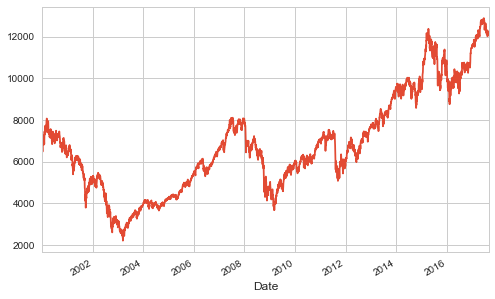

In [51]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [52]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 3.12 ms, sys: 664 µs, total: 3.79 ms
Wall time: 3.28 ms


In [53]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2017-08-23,12174.299805,-0.004511,-0.004511
2017-08-24,12180.830078,0.000536,0.000536
2017-08-25,12167.940430,-0.001059,-0.001059
2017-08-28,12123.469727,-0.003661,-0.003661
2017-08-29,12123.469727,0.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1028ecc88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1029b8ef0>], dtype=object)

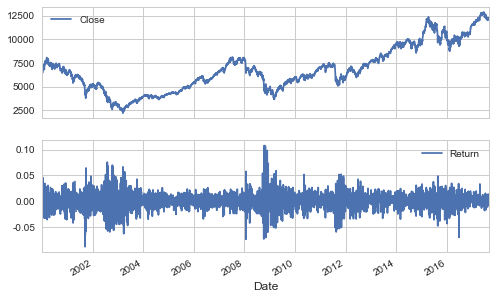

In [54]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [55]:
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()

In [56]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-08-23,12174.299805,12320.656599,NaN
2017-08-24,12180.830078,12308.985421,NaN
2017-08-25,12167.940430,12297.572824,NaN
2017-08-28,12123.469727,12290.603283,NaN
2017-08-29,12123.469727,12285.802083,NaN


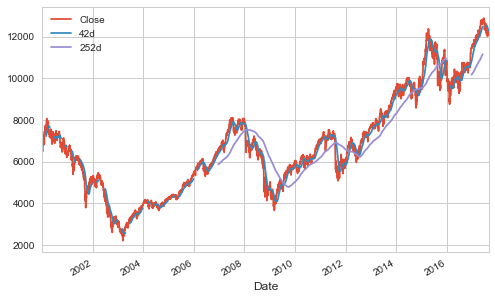

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [58]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fb57710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fde0e48>], dtype=object)

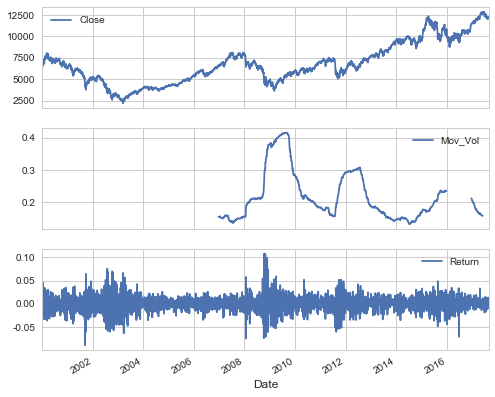

In [59]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [60]:
import pandas as pd
from urllib.request import urlretrieve

In [61]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt
# Windows: use dir

-rw-r--r--  1 joelkim  688500  8 29 16:24 ./data/es.txt
-rw-r--r--  1 joelkim  363485  8 29 16:24 ./data/vs.txt


In [62]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [63]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [64]:
for line in lines[3883:3890]:
    print(line[41:], end='')

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [65]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [66]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [67]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [68]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [69]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [70]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [71]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [72]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [73]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [74]:
data = data[data.index < '2014-09-27']

In [75]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
EUROSTOXX    4034 non-null float64
VSTOXX       4034 non-null float64
dtypes: float64(2)
memory usage: 94.5 KB


In [76]:
data.tail()

,EUROSTOXX,VSTOXX
2014-09-22,3257.48,15.8303
2014-09-23,3205.93,17.7684
2014-09-24,3244.01,15.9504
2014-09-25,3202.31,17.5658
2014-09-26,3219.58,17.6012


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ff052b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110386278>], dtype=object)

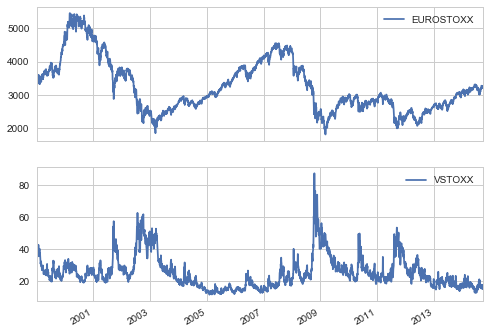

In [77]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [78]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [79]:
rets.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f43e860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f4562e8>], dtype=object)

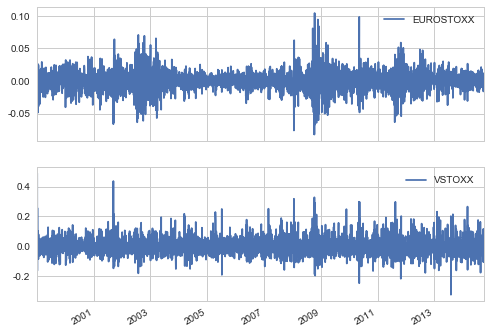

In [80]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [81]:
import numpy as np

In [82]:
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([ -2.75289438e+00,  -7.36991255e-05])

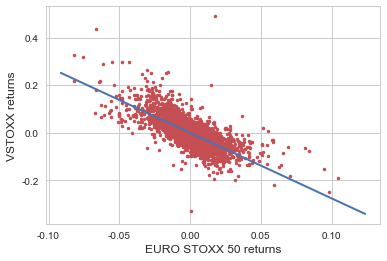

In [83]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [84]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.729538
VSTOXX,-0.729538,1.000000


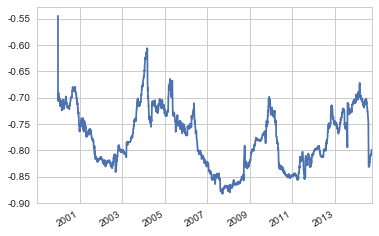

In [85]:
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [86]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [87]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [88]:
# 최근 자료만 제공하므로 실행 시간에 따라 날짜를 바꿔야 한다.
year = '2017'
month = '08'
days = ['27', '28', '29']

In [89]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [90]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9685 entries, 2017-08-28 10:00:01 to 2017-08-29 02:00:01
Data columns (total 6 columns):
bid        9685 non-null float64
bdepth     9685 non-null object
bdeptht    9685 non-null object
offer      9685 non-null float64
odepth     9685 non-null object
odeptht    9685 non-null object
dtypes: float64(2), object(4)
memory usage: 529.6+ KB


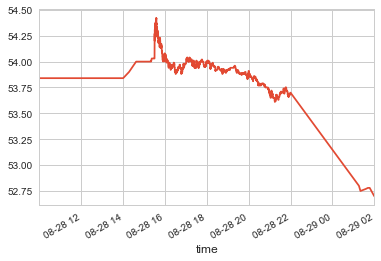

In [91]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11117fb38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1112352b0>], dtype=object)

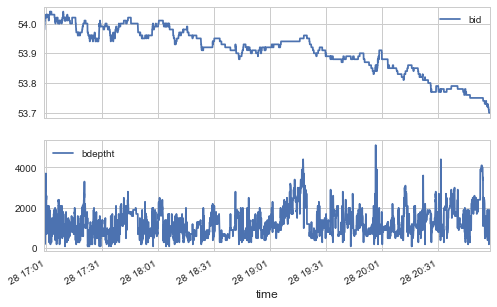

In [92]:
# 데이터의 시간에 맞게 바꿔야 한다.
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2017, 8, 28, 17, 0))
 &  (NKE.index < dt.datetime(2017, 8, 28, 20, 59))]
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)

In [93]:
NKE_resam = NKE.resample(rule='5min').mean()
np.round(NKE_resam.head(), 2)

,bid,offer
time,,
2017-08-28 10:00:00,53.84,54.8
2017-08-28 10:05:00,NaN,NaN
2017-08-28 10:10:00,NaN,NaN
2017-08-28 10:15:00,NaN,NaN
2017-08-28 10:20:00,53.84,54.8


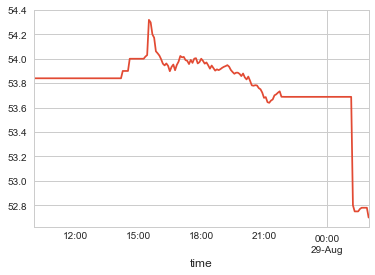

In [94]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [95]:
def reversal(x):
    return 2 * 95 - x

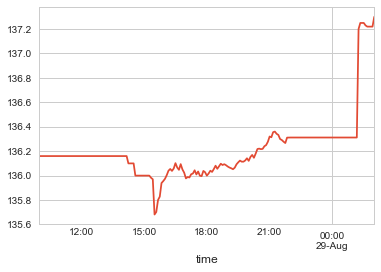

In [96]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [97]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>